<a href="https://www.kaggle.com/code/oakthyago/bank-of-brazil-public-tender-2023?scriptVersionId=135518549" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("/kaggle/input/tacbb23/original_df.csv")
df3 = pd.read_csv("/kaggle/input/tacbb23/map df.csv")

<Figure size 2000x1400 with 0 Axes>

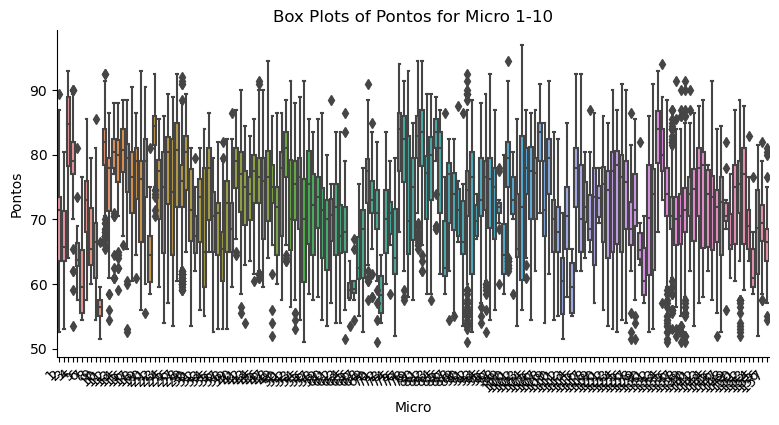

In [3]:


# Filter the data for Micro 1 to Micro 10
micro_data = df[df['Micro'].isin(range(1, 158))]

# Set the figure size
plt.figure(figsize=(20, 14))

# Create the box plot grid using catplot
sns.catplot(data=micro_data, x='Micro', y='Pontos', kind='box', height=4, aspect=2)

# Set plot title and labels
plt.title('Box Plots of Pontos for Micro 1-10')
plt.xlabel('Micro')
plt.ylabel('Pontos')

# Adjust x-axis tick spacing
plt.xticks(rotation=45, ha='right')

# Save the figure with higher DPI
plt.savefig('box_plots4.png', dpi=300)

# Show the plot
plt.show()

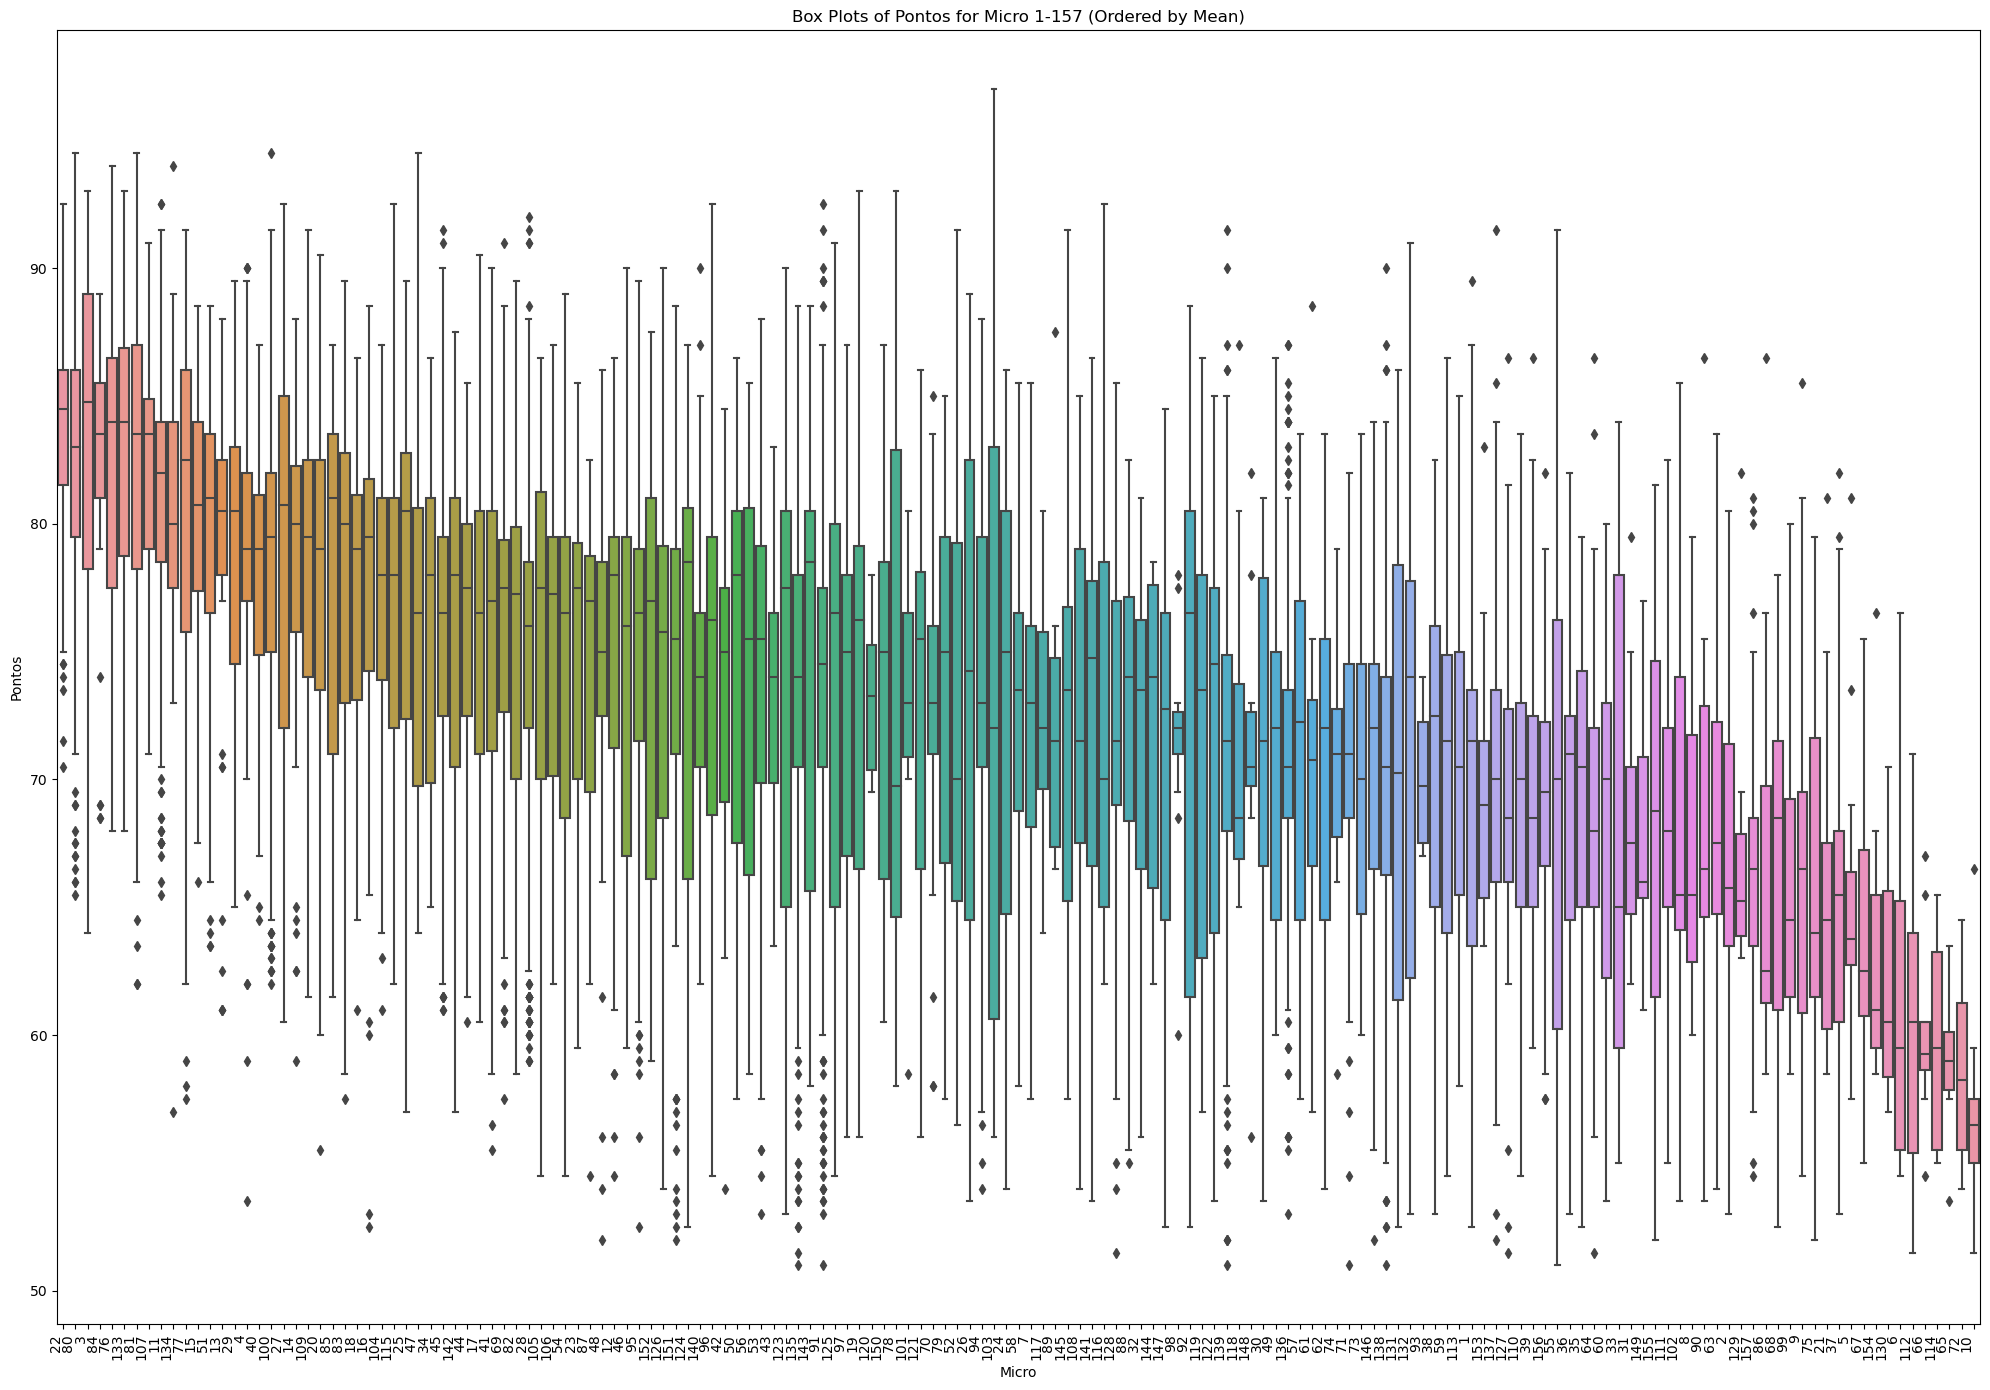

In [4]:


# Filter the data for Micro 1 to Micro 157
micro_data = df[df['Micro'].isin(range(1, 158))]

# Calculate the mean of "Pontos" for each micro
mean_pontos = micro_data.groupby('Micro')['Pontos'].mean()

# Sort the micros based on their mean "Pontos" values in descending order
sorted_micros = mean_pontos.sort_values(ascending=False)

# Store the sorted micros in a separate list
micro_list = sorted_micros.index.tolist()

# Calculate the box plot variables for each micro and store them in a list
boxplot_vars = []
for micro in micro_list:
    micro_subset = micro_data[micro_data['Micro'] == micro]
    boxplot_vars.append(micro_subset['Pontos'])

# Set the figure size
plt.figure(figsize=(20, 14))

# Plot the box plots in the order of highest to lowest mean
sns.boxplot(data=boxplot_vars)

# Set the x-axis labels using the micro numbers
plt.xticks(range(len(micro_list)), micro_list, rotation=90, ha='right')

# Set plot title and labels
plt.title('Box Plots of Pontos for Micro 1-157 (Ordered by Mean)')
plt.xlabel('Micro')
plt.ylabel('Pontos')

# Save the figure with higher DPI
plt.savefig('box_plots_ordered.png', dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
# Create a dictionary mapping MICRO to LOCAL PROVA
mapping_dict = dict(zip(df3['MICRO'], df3['LOCAL DE PROVA']))

# Map the values in micro_list to their corresponding LOCAL PROVA values
mapped_list = [mapping_dict.get(micro, micro) for micro in micro_list]

In [6]:
# Create a DataFrame from mapped_list
df_mapped = pd.DataFrame(mapped_list, columns=['LOCAL PROVA'])

# Rename the column
df_mapped = df_mapped.rename(columns={'LOCAL PROVA': 'Cities Scores Mean Ordenated'})

# Set the index to start from 1
df_mapped.index = df_mapped.index + 1

# Export the DataFrame to an Excel file
df_mapped.to_excel('mapped_list.xlsx', index=True, startrow=1)


In [7]:
mapping_dict

{1: 'RIO BRANCO - AC',
 2: 'CRUZEIRO DO SUL - AC',
 3: 'MACEIO - AL',
 4: 'ARAPIRACA - AL',
 5: 'TABATINGA - AM',
 6: 'MANICORE - AM',
 7: 'MANAUS - AM',
 8: 'PARINTINS - AM',
 9: 'MACAPA - AP',
 10: 'OIAPOQUE - AP',
 11: 'SALVADOR - BA ou CAMACARI - BA ou LAURO DE FREITAS - BA,',
 12: 'SANTO ANTONIO DE JESUS - BA',
 13: 'FEIRA DE SANTANA - BA',
 14: 'ITABUNA - BA ou ILHEUS - BA',
 15: 'VITORIA DA CONQUISTA - BA ou JEQUIE - BA',
 16: 'GUANAMBI - BA',
 17: 'BARREIRAS - BA',
 18: 'IRECE - BA',
 19: 'JUAZEIRO - BA',
 20: 'PAULO AFONSO - BA',
 21: 'BURITIRAMA - BA',
 22: 'FORTALEZA - CE',
 23: 'QUIXADA - CE',
 24: 'CRATEUS - CE',
 25: 'SOBRAL - CE',
 26: 'IGUATU - CE',
 27: 'JUAZEIRO DO NORTE - CE',
 28: 'BRASILIA - DF',
 29: 'VITORIA - ES  ou SERRA - ES ou VILA VELHA - ES ou\nCARIACICA - ES',
 30: 'CACHOEIRO DE ITAPEMIRIM - ES',
 31: 'AFONSO CLAUDIO - ES',
 32: 'LINHARES - ES',
 33: 'COLATINA - ES',
 34: 'GOIANIA - GO ou APARECIDA DE GOIANIA - GO ou\nANAPOLIS - GO',
 35: 'ITUMBIARA - GO',

# Vacancies Analysis




### Calculate the Vacancies for Each Micro:

Calculate the number of vacancies available for each "Micro" (a category or group) in the dataset, and store this information in the "df4" DataFrame.

### Plot the Scores of Approved Individuals:

Create a visualization to display the scores of the approved individuals in each "Micro" group. This plot helps in understanding the distribution and range of scores for each group.

### Create Box Plots by Mean Score:

Generate box plots based on the scores of the approved individuals in each "Micro" group. Box plots provide a concise summary of the score distribution, including measures like the median, quartiles, and outliers. The box plots should be ordered based on the mean score of each "Micro" group, with the group having the highest mean score displayed first.

In summary, the process involves calculating the vacancies for each "Micro" group, plotting the scores of the approved individuals for each group, and creating box plots ordered by the mean scores of each "Micro" group.

In [8]:
df4 = pd.read_csv("/kaggle/input/tacbb23/vacancies_df.csv")

In [9]:
new_columns = ['Cargo', 'Macro.Micro', 'Inscricao', 'Nome', 'D.Nasc', 'L.Port',
               'L.Ingl', 'Mat', 'Atu.Merc.Finan', 'Total.Conhe.Basc', 'Mat.Finan',
               'Conhec.Ban', 'Conhec.Inf', 'Ven_Neg', 'Tot.Conhec.Espec', 'Pontos',
               'Cla_AC', 'Cla_PCD', 'Cla_PPP', 'Situacao', 'Macro', 'Micro']

df.columns = new_columns

df.columns

Index(['Cargo', 'Macro.Micro', 'Inscricao', 'Nome', 'D.Nasc', 'L.Port',
       'L.Ingl', 'Mat', 'Atu.Merc.Finan', 'Total.Conhe.Basc', 'Mat.Finan',
       'Conhec.Ban', 'Conhec.Inf', 'Ven_Neg', 'Tot.Conhec.Espec', 'Pontos',
       'Cla_AC', 'Cla_PCD', 'Cla_PPP', 'Situacao', 'Macro', 'Micro'],
      dtype='object')

In [10]:

x = 1  # Starting value
end = 157

values = []
for i in range(x, end+1):
    ac_value = df4.loc[i, "AC"]  # Get the AC value from df4
    pontos_values = df[df["Micro"] == i]["Pontos"].head(int(ac_value)).tolist()  # Get the first AC values of "Pontos"
    values.extend([[i, pontos] for pontos in pontos_values])

new_df = pd.DataFrame(values, columns=["Micro", "Pontos"])

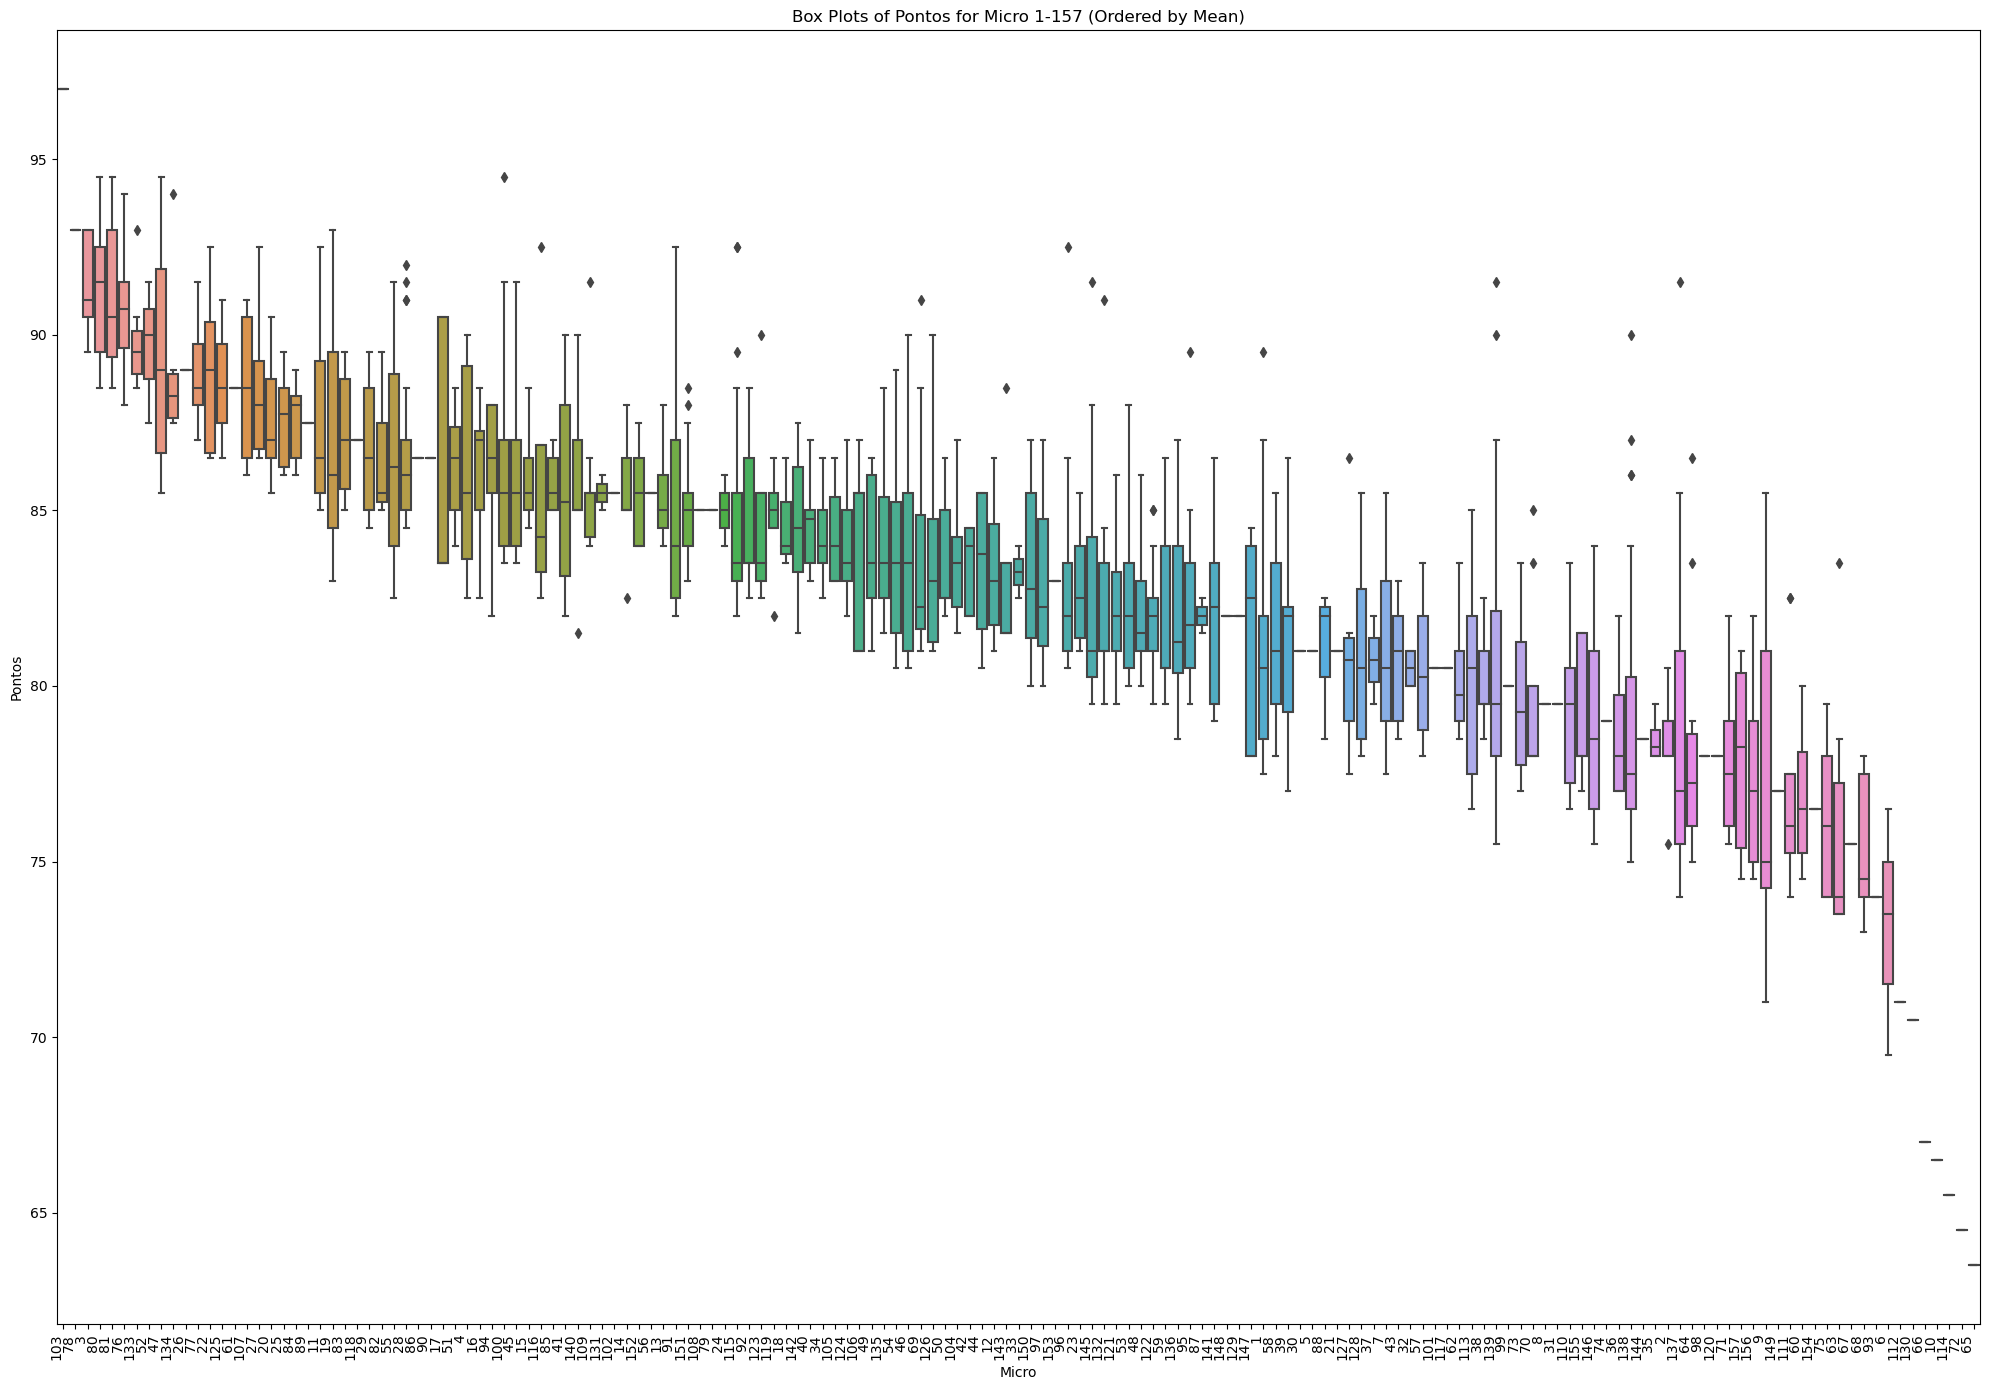

In [11]:
# Calculate the mean of "Pontos" for each Micro value
mean_pontos = new_df.groupby('Micro')['Pontos'].mean()

# Sort the Micro values based on their mean "Pontos" values in descending order
sorted_micros = mean_pontos.sort_values(ascending=False)

# Store the sorted Micro values in a separate list
micro_list2 = sorted_micros.index.tolist()

# Calculate the box plot variables for each Micro and store them in a list
boxplot_vars = []
for micro in micro_list2:
    micro_subset = new_df[new_df['Micro'] == micro]
    boxplot_vars.append(micro_subset['Pontos'])

# Set the figure size
plt.figure(figsize=(20, 14))

# Plot the box plots in the order of highest to lowest mean
sns.boxplot(data=boxplot_vars)

# Set the x-axis labels using the Micro numbers
plt.xticks(range(len(micro_list2)), micro_list2, rotation=90, ha='right')

# Set plot title and labels
plt.title('Box Plots of Pontos for Micro 1-157 (Ordered by Mean)')
plt.xlabel('Micro')
plt.ylabel('Pontos')

# Save the figure with higher DPI
plt.savefig('box_plots_ordered_.png', dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box Plot of all Scores Immediate Vacancies')

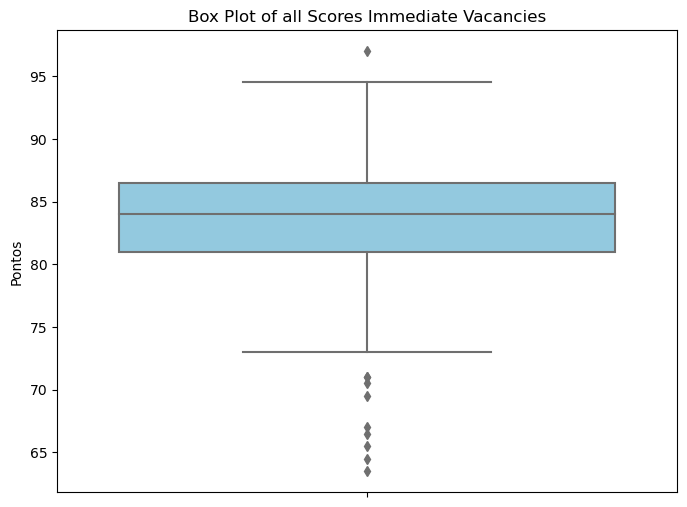

In [12]:

plt.figure(figsize=(8, 6))

# Create the inverted box plot with colors
sns.boxplot(y=new_df["Pontos"], orient="v", color="skyblue")

plt.ylabel("Pontos")
plt.title("Box Plot of all Scores Immediate Vacancies")

In [13]:
new_df["Pontos"].max()

97.0

In [14]:
max_pontos = new_df["Pontos"].max()
new_df.loc[new_df["Pontos"] == max_pontos, "Micro"].values[0]

103

In [15]:
new_df["Pontos"].min()

63.5

In [16]:
min_pontos = new_df["Pontos"].min()
new_df.loc[new_df["Pontos"] == min_pontos, "Micro"].values[0]

65

In [17]:
# Create a dictionary mapping MICRO to LOCAL PROVA
mapping_dict2 = dict(zip(df3['MICRO'], df3['LOCAL DE PROVA']))

# Map the values in micro_list to their corresponding LOCAL PROVA values
mapped_list2 = [mapping_dict2.get(micro, micro) for micro in micro_list2]

# Create a DataFrame from mapped_list
df_mapped2 = pd.DataFrame(mapped_list2, columns=['LOCAL PROVA'])

# Rename the column
df_mapped2 = df_mapped2.rename(columns={'LOCAL PROVA': 'Cities Scores Mean Ordenated'})

# Set the index to start from 1
df_mapped2.index = df_mapped2.index + 1

# Export the DataFrame to an Excel file
df_mapped2.to_excel('mapped_list2.xlsx', index=True, startrow=1)


In [18]:
df_mapped2

,Cities Scores Mean Ordenated
1,VOLTA REDONDA - RJ ou\nRESENDE - RJ
2,PATOS - PB
3,MACEIO - AL
4,RECIFE - PE
5,CARUARU - PE
...,...
153,CARLINDA - MT
154,OIAPOQUE - AP
155,RORAINOPOLIS - RR
156,SAO FELIX DO XINGU - PA
